<a href="https://colab.research.google.com/github/BrennZA/Introduction-to-DS-w-Python/blob/main/tv-sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# import advertising CSV file

advertising = pd.read_csv('/content/Advertising.csv')
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [21]:
# For exercise

advertising.iloc[:7]

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8


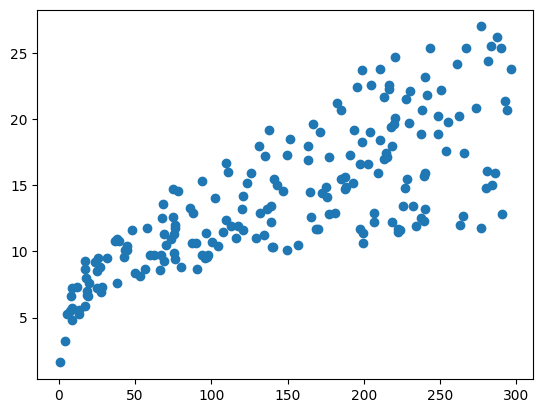

In [23]:
# For exercise

plt.scatter(advertising['TV'], advertising['sales']);

In [ ]:
# Looking for average results score of each subject - getting errors when using groupby() related to series object
### Depending on the function used returns can be a dataframe, series / numpy array
### Every column in DataFrame are a series
### Don't select column then groupby()
### groupby() first then mean() after

In [6]:
# Create DataFrame of TV advertising & sales

tv_sales = pd.DataFrame({'tv': advertising['TV'], 'sales': advertising['sales']})
tv_sales.head()

,tv,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


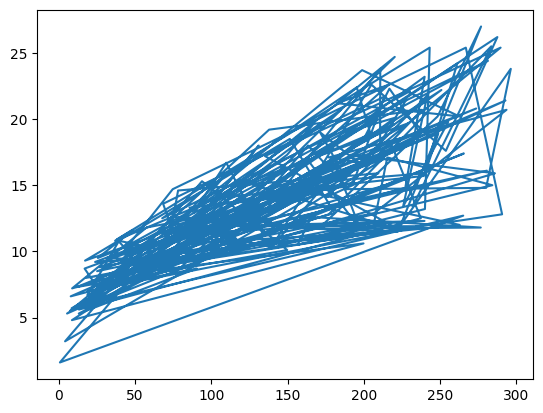

In [8]:
# Plot figure for tv_sales

fig = plt.plot(tv_sales['tv'], tv_sales['sales']);

In [20]:
# Sort rows by tv's values column

tv_sales = tv_sales.sort_values(by='tv')
tv_sales.head(10)

,tv,sales
130,0.7,1.6
155,4.1,3.2
78,5.4,5.3
56,7.3,5.5
126,7.8,6.6
132,8.4,5.7
8,8.6,4.8
5,8.7,7.2
158,11.7,7.3
108,13.1,5.3


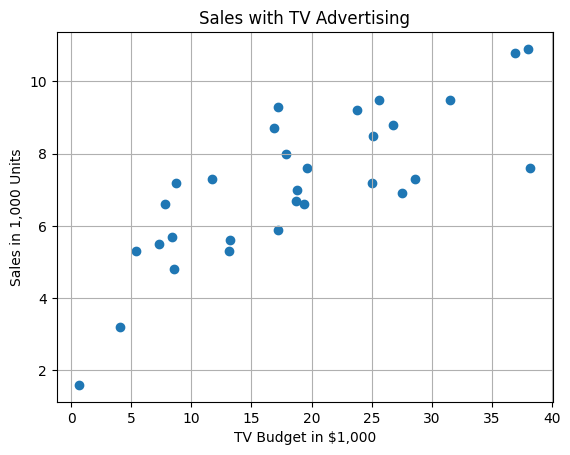

In [19]:
# Plot scatter figure of tv_sales
limited_tv_sales = tv_sales.iloc[:30]

fig = plt.scatter(limited_tv_sales['tv'], limited_tv_sales['sales'])

plt.grid(True)

plt.xlabel('TV Budget in $1,000')
plt.ylabel('Sales in 1,000 Units')
plt.title('Sales with TV Advertising');